In [174]:
# Importing necessary libraries

import sklearn
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler

In [175]:
# Reading the treasury yield curve dataset using pandas
df = pd.read_csv("hw5_treasury yield curve data.csv")

In [176]:
df.head()


,Date,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
0,5/17/2019,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,...,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458,10.130177
1,5/16/2019,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,...,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636,10.130177
2,5/15/2019,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,...,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257,10.150118
3,5/14/2019,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,...,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113,10.130177
4,5/13/2019,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,...,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525,10.130177


In [187]:
df = df.drop(["Date"],axis =1)


In [188]:
# Summary statistics of the dataset

df.describe()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
count,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,...,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000
mean,3.785311,4.258972,4.669363,5.022430,5.318493,5.559644,5.750071,5.895135,6.000596,6.072112,...,5.689046,5.621666,5.554136,5.486943,5.420479,5.355063,5.290948,5.228333,5.167371,5.509793
std,2.648060,2.498137,2.341348,2.221632,2.137801,2.080405,2.040337,2.010786,1.987244,1.966960,...,1.801291,1.797858,1.797012,1.798842,1.803390,1.810643,1.820541,1.832984,1.847834,2.491110
min,0.072700,0.327300,0.630300,1.013000,1.424500,1.698200,1.807300,1.885000,1.942100,1.988200,...,1.489600,1.283000,1.100800,0.941000,0.801800,0.681200,0.577100,0.487600,0.411100,2.801050
25%,1.144050,1.865600,2.536550,3.023050,3.544700,4.063300,4.409750,4.644300,4.774550,4.859500,...,4.177450,4.090550,4.024800,3.982950,3.962100,3.887150,3.840900,3.825050,3.831350,3.130587
50%,3.986500,4.393300,4.505500,4.718900,5.051300,5.394600,5.663700,5.870800,5.993700,6.082400,...,5.619600,5.503000,5.369900,5.228000,5.096700,4.979700,4.860800,4.758600,4.669000,4.956219
75%,5.901500,6.221250,6.461300,6.626600,6.779550,6.908050,7.049900,7.181600,7.297550,7.393350,...,7.330550,7.233200,7.114900,6.998150,6.871050,6.765400,6.650600,6.535450,6.421850,8.051437
max,9.813800,9.887800,10.145600,10.459900,10.649900,10.741400,10.766300,10.747500,10.701500,10.640000,...,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.150118


In [189]:
# Checking for missing values : if unique is 1 and if it corresponds to False, then no missing values

df.isnull().describe() 

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
count,8071,8071,8071,8071,8071,8071,8071,8071,8071,8071,...,8071,8071,8071,8071,8071,8071,8071,8071,8071,8071
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,8071,8071,8071,8071,8071,8071,8071,8071,8071,8071,...,8071,8071,8071,8071,8071,8071,8071,8071,8071,8071


In [190]:
# Printing top 5 samples of the dataset

df.head()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
0,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,2.8054,...,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458,10.130177
1,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,2.8247,...,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636,10.130177
2,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,2.7951,...,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257,10.150118
3,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,2.8289,...,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113,10.130177
4,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,2.8029,...,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525,10.130177


In [191]:
# Creating feature & target variables

X = df.drop(["Adj_Close"], axis = 1)
y = df["Adj_Close"]

# Printing top 5 feature and target samples

X.head()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF21,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30
0,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,2.8054,...,3.2840,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458
1,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,2.8247,...,3.3063,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636
2,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,2.7951,...,3.3089,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257
3,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,2.8289,...,3.3396,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113
4,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,2.8029,...,3.3192,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525


In [192]:
y.head()

0    10.130177
1    10.130177
2    10.150118
3    10.130177
4    10.130177
Name: Adj_Close, dtype: float64

In [193]:
# Checking the dimensions of feature and target matrices
X.shape

(8071, 30)

In [194]:
y.shape

(8071,)

In [195]:
# Checking the data type of all the variables
df.dtypes

SVENF01      float64
SVENF02      float64
SVENF03      float64
SVENF04      float64
SVENF05      float64
SVENF06      float64
SVENF07      float64
SVENF08      float64
SVENF09      float64
SVENF10      float64
SVENF11      float64
SVENF12      float64
SVENF13      float64
SVENF14      float64
SVENF15      float64
SVENF16      float64
SVENF17      float64
SVENF18      float64
SVENF19      float64
SVENF20      float64
SVENF21      float64
SVENF22      float64
SVENF23      float64
SVENF24      float64
SVENF25      float64
SVENF26      float64
SVENF27      float64
SVENF28      float64
SVENF29      float64
SVENF30      float64
Adj_Close    float64
dtype: object

In [196]:
# Data Normalisation

sc_x  = StandardScaler()
sc_y  = StandardScaler()

X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [197]:
# Printing normalised samples
X[0]


array([-0.62801241, -0.89367021, -1.09647185, -1.25353893, -1.37509269,
       -1.46876846, -1.54061094, -1.59481578, -1.6343227 , -1.66089503,
       -1.67593385, -1.68031508, -1.67488095, -1.66046348, -1.63778634,
       -1.60760025, -1.57059152, -1.52744419, -1.47884215, -1.42539682,
       -1.36779709, -1.30666924, -1.24270328, -1.17654589, -1.10880562,
       -1.04026033, -0.97146258, -0.90300097, -0.83548343, -0.76936512])

In [198]:
y[0]

1.8548635119646166

In [201]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15,random_state = 42)

In [202]:
X_train.shape

(6860, 30)

In [203]:
y_train.shape

(6860,)

In [204]:
X_test.shape

(1211, 30)

In [205]:
y_test.shape

(1211,)

In [207]:
# PCA using sklearn : all components

from sklearn.decomposition import PCA

pca         = PCA()

X_pca       = pca.fit_transform(X)

exp_var     = pca.explained_variance_ratio_

cum_exp_var = np.cumsum(exp_var)

print("explained variance: ", exp_var,"\n")
print("cummulative explained variance: ", cum_exp_var)

explained variance:  [9.31551578e-01 4.10381396e-02 2.17571894e-02 4.90770793e-03
 6.66258468e-04 6.84682628e-05 9.45877274e-06 1.10715135e-06
 8.49789606e-08 6.73577380e-09 4.73158760e-10 3.80813920e-11
 9.20784805e-12 8.66497245e-12 8.59068493e-12 8.49070772e-12
 8.41484271e-12 8.35670553e-12 8.23409147e-12 8.08402573e-12
 8.02111802e-12 7.95771187e-12 7.72519406e-12 7.59629463e-12
 7.53783680e-12 7.45158811e-12 7.28531780e-12 6.89854502e-12
 6.59291154e-12 6.29310460e-12] 

cummulative explained variance:  [0.93155158 0.97258972 0.99434691 0.99925461 0.99992087 0.99998934
 0.9999988  0.99999991 0.99999999 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [208]:
len(exp_var)


30

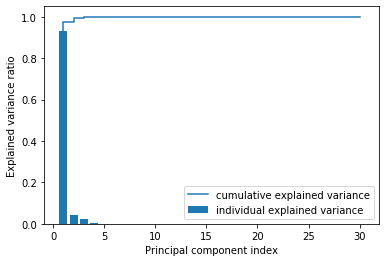

In [209]:
pca_ev = plt.bar(range(1,31),exp_var,
                 label = 'individual explained variance')
pca_ev = plt.step(range(1,31),cum_exp_var,
                  label = 'cumulative explained variance')

pca_ev = plt.ylabel("Explained variance ratio")
pca_ev = plt.xlabel("Principal component index")
pac_ev = plt.legend(loc='best')
plt.show()

In [210]:
# PCA with 3 components

pca_3   = PCA(n_components = 3)

X_pca_3 = pca_3.fit_transform(X)

exp_var_3 = pca_3.explained_variance_ratio_

cum_exp_var_3 = np.cumsum(exp_var_3)

print("explained variance of 3 components: ", exp_var_3, "\n\n")

print("cumulative explained variance of 3 components: ", cum_exp_var_3)

explained variance of 3 components:  [0.93155158 0.04103814 0.02175719] 


cumulative explained variance of 3 components:  [0.93155158 0.97258972 0.99434691]


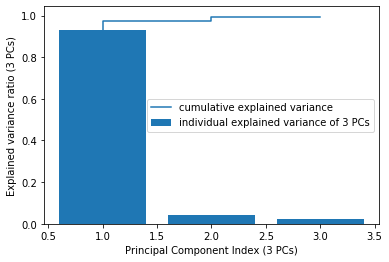

In [211]:
pca_ev_3 = plt.bar(range(1,4),exp_var_3, label = "individual explained variance of 3 PCs")
pca_ev_3 = plt.step(range(1,4),cum_exp_var_3, label = "cumulative explained variance")

pca_ev_3 = plt.xlabel("Principal Component Index (3 PCs)")
pca_ev_3 = plt.ylabel("Explained variance ratio (3 PCs)")

pca_ev_3 = plt.legend(loc = "best")
plt.show()


In [212]:
X_pca_3.shape


(8071, 3)

In [213]:
X_pca_3[1]


array([-7.25452987, -1.17875588, -0.94525198])

In [214]:
# train test split of PCA data

X_train_pca, X_test_pca,y_train_pca,y_test_pca = train_test_split(X_pca_3,y,test_size = 0.15, random_state =42)

In [215]:
X_train_pca.shape

(6860, 3)

In [216]:
y_train_pca.shape

(6860,)

In [217]:
X_test_pca.shape

(1211, 3)

In [218]:
y_test_pca.shape

(1211,)

In [219]:
# linear regression using all attributes

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [220]:
# Intercept of lr

lr.intercept_

-0.0002537350463017512

In [221]:
# Predicting the target variable

y_train_pred = lr.predict(X_train)
y_test_pred  = lr.predict(X_test)


In [222]:
# printing samples of predictions on training data

y_train_pred[0:5]


array([ 0.6198894 , -0.17297496, -1.65296845, -1.52503999,  1.25915686])

In [223]:
# printing samples of predictions on test data

y_test_pred[0:5]

array([ 1.63351896,  0.43975065,  0.86234581,  0.15821232, -0.98982547])

In [224]:
# printing coefficient array of the linear regression

lr.coef_


array([  -5.14327815,   53.30879985, -234.75984563,  526.53080518,
       -589.53293754,  190.49261133,  236.9452331 , -244.27542215,
        -35.35257675,  253.21581884, -225.54357964,  155.13438245,
         -0.6856332 ,  -66.20127944,  -72.96036713,   -5.61950765,
       -224.71415001,  159.6849403 ,  100.31867125,   97.38326492,
        408.40919409, -280.29278264,  127.15046123, -301.93074584,
       -574.37042304,  172.85089173,   74.64506844,  613.2819432 ,
        -59.10610168, -249.61100677])

In [225]:
# length of the coefficient array

len(lr.coef_)

30

In [226]:
# Importing relevant score metrics

from sklearn.metrics import r2_score, mean_squared_error

In [228]:
# calculating & printing accuracy R^2 and rmse

r2_tr_lr     = r2_score(y_train,y_train_pred)
r2_test_lr   = r2_score(y_test,y_test_pred)

mse_tr_lr    = mean_squared_error(y_train,y_train_pred)
mse_test_lr  = mean_squared_error(y_test,y_test_pred)

rmse_tr_lr   = np.sqrt(mse_tr_lr)
rmse_test_lr = np.sqrt(mse_test_lr)

print("Score metrics of linear regression model with all the attributes:","\n\n")

print("R^2 of training set: ",r2_tr_lr,"\n")
print("R^2 of test set: ",r2_test_lr,"\n")

print("rmse of training set: ",rmse_tr_lr,"\n")
print("rmse of test set: ",rmse_test_lr,"\n")

Score metrics of linear regression model with all the attributes: 


R^2 of training set:  0.9022730353400431 

R^2 of test set:  0.9041309535337722 

rmse of training set:  0.31178924107181893 

rmse of test set:  0.31408405531078176 



In [229]:
# SVM regression with all the attributes

from sklearn.svm import SVR

svr = SVR(gamma = "auto")

svr.fit(X_train,y_train)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [230]:
# predicting the target variable using svr

y_train_pred_svr = svr.predict(X_train)
y_test_pred_svr  = svr.predict(X_test)

In [231]:
# printing samples of training predictions

y_train_pred_svr[0:5]

array([ 0.80696226, -0.35072674, -1.05485499, -0.97411025,  1.71839809])

In [232]:
# printing samples of test predictions

y_test_pred_svr[0:5]

array([ 1.63556563,  0.5112187 ,  0.90078472, -0.0054551 , -0.92901116])

In [233]:
# Calculating and printing accuracy R^2 and rmse

r2_tr_svm     = r2_score(y_train,y_train_pred_svr)
r2_test_svm   = r2_score(y_test,y_test_pred_svr)

mse_tr_svm    = mean_squared_error(y_train,y_train_pred_svr)
mse_test_svm  = mean_squared_error(y_test,y_test_pred_svr)

rmse_tr_svm   = np.sqrt(mse_tr_svm)
rmse_test_svm = np.sqrt(mse_test_svm)

print("Score metrics of SVM Regressor with all the attributes","\n")

print("Accuracy R^2 Score of training set: ",r2_tr_svm,"\n")
print("Accuracy R^2 Score of test set: ",r2_test_svm,"\n")

print("RMSE of training set: ",rmse_tr_svm,"\n")
print("RMSE of test set: ",rmse_test_svm,"\n")


Score metrics of SVM Regressor with all the attributes 

Accuracy R^2 Score of training set:  0.9894022898799042 

Accuracy R^2 Score of test set:  0.9895669606579882 

RMSE of training set:  0.10267387143227558 

RMSE of test set:  0.10361248942902963 



In [234]:
# Linear Regression with 3 PCAs

lr_pca = LinearRegression()

lr_pca.fit(X_train_pca,y_train_pca)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [235]:
# predicting the target variable

y_train_pred_pca = lr_pca.predict(X_train_pca)
y_test_pred_pca  = lr_pca.predict(X_test_pca)

In [236]:
# Printing the sample predictions

y_train_pred_pca[0:5]

array([ 0.38044872, -0.11116546, -1.8698518 , -1.5025194 ,  1.23807999])

In [237]:
y_test_pred_pca[0:5]

array([ 1.58036301,  0.72049814,  0.53753648,  0.11674246, -1.2809105 ])

In [238]:
# printing the coefficient estimates of the model

lr_pca.coef_

array([-0.17042899, -0.19468123,  0.10719771])

In [239]:

# printing the intercept of the model

lr_pca.intercept_

0.00023009009540402633

In [240]:
# calculating & printing accuracy R^2 and rmse

r2_tr_lr_pca     = r2_score(y_train_pca,y_train_pred_pca)
r2_test_lr_pca   = r2_score(y_test_pca,y_test_pred_pca)

mse_tr_lr_pca    = mean_squared_error(y_train_pca,y_train_pred_pca)
mse_test_lr_pca  = mean_squared_error(y_test_pca,y_test_pred_pca)

rmse_tr_lr_pca   = np.sqrt(mse_tr_lr_pca)
rmse_test_lr_pca = np.sqrt(mse_test_lr_pca)

print("Score metrics of linear regression model with 3 PCAs","\n\n")

print("R^2 of training set: ",r2_tr_lr_pca,"\n")
print("R^2 of test set: ",r2_test_lr_pca,"\n")

print("rmse of training set: ",rmse_tr_lr_pca,"\n")
print("rmse of test set: ",rmse_test_lr_pca,"\n")


Score metrics of linear regression model with 3 PCAs 


R^2 of training set:  0.8671016816035844 

R^2 of test set:  0.8661280187278886 

rmse of training set:  0.3635914505503227 

rmse of test set:  0.37115176592109095 



In [241]:
# SVM Regressor with 3 PCAs

svr_pca = SVR(gamma = "auto")

svr_pca.fit(X_train_pca,y_train_pca)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [243]:
# predicting the target variable 

y_train_pred_svr_pca = svr_pca.predict(X_train_pca)
y_test_pred_svr_pca  = svr_pca.predict(X_test_pca)

In [244]:

# printing the prediction samples

print(y_train_pred_svr_pca[0:5],"\n",y_test_pred_svr_pca[0:5])

[ 0.70649774 -0.51350124 -1.00024552 -0.96429536  1.77173722] 
 [ 1.5874927   0.87886496  1.02553839  0.05390764 -0.9684526 ]


In [245]:
# Calculating & printing the Accuracy R^2 Score and RMSE

r2_tr_svr_pca     = r2_score(y_train_pca,y_train_pred_svr_pca)
r2_test_svr_pca   = r2_score(y_test_pca,y_test_pred_svr_pca)

mse_tr_svr_pca    = mean_squared_error(y_train_pca,y_train_pred_svr_pca)
mse_test_svr_pca  = mean_squared_error(y_test_pca,y_test_pred_svr_pca)

rmse_tr_svr_pca   = np.sqrt(mse_tr_svr_pca)
rmse_test_svr_pca = np.sqrt(mse_test_svr_pca)

print("Score metrics of SVR with 3 PCAs: ","\n")

print("R^2 Score of training set: ",r2_tr_svr_pca,"\n")
print("R^2 Score of test set: ",r2_test_svr_pca,"\n")

print("RMSE of training set: ",rmse_tr_svr_pca,"\n")
print("RMSE of test set: ",rmse_test_svr_pca,"\n")

Score metrics of SVR with 3 PCAs:  

R^2 Score of training set:  0.9893204761262603 

R^2 Score of test set:  0.9895212187142071 

RMSE of training set:  0.10306942787128902 

RMSE of test set:  0.10383937696621369 



In [246]:
import time


In [247]:
# time to fit and predict with linear regression, considering all the attributes

s_lr_t    = time.time()

lr_t      = LinearRegression()

lr_t.fit(X_train,y_train)

y_t_pred  = lr_t.predict(X_train)
y_ts_pred = lr_t.predict(X_test)

e_lr_t    = time.time()

print("lr time with all the attributes: ",(e_lr_t-s_lr_t))

lr time with all the attributes:  0.9135565757751465


In [248]:
# time to fit and predict with linear regression, considering 3 PCAs

s_lr_t_pca    = time.time()

lr_t_pca      = LinearRegression()

lr_t_pca.fit(X_train_pca,y_train_pca)

y_t_pred_pca  = lr_t_pca.predict(X_train_pca)
y_ts_pred_pca = lr_t_pca.predict(X_test_pca)

e_lr_t_pca    = time.time()

print("lr time with PCA: ",(e_lr_t_pca-s_lr_t_pca))

lr time with PCA:  0.004987478256225586


In [249]:
# time to fit and predict SVR with all the attributes

s_svr_t       = time.time()

svr_t         = SVR(gamma = "auto")

svr_t.fit(X_train,y_train)

y_t_pred_svr  = svr_t.predict(X_train)
y_ts_pred_svr = svr_t.predict(X_test)

e_svr_t       = time.time()

print("SVR time with all the atrributes: ",(e_svr_t-s_svr_t))

SVR time with all the atrributes:  1.6655776500701904


In [250]:
# time to fit and predict SVR with 3 PCAs

s_svr_t_pca   = time.time()

svr_t_pca     = SVR(gamma = "auto")

svr_t_pca.fit(X_train_pca,y_train_pca)

y_t_pred_svr_pca = svr_t_pca.predict(X_train_pca)
y_ts_pred_svr_pca = svr_t_pca.predict(X_test_pca)

e_svr_t_pca = time.time()

print("SVR time with 3 PCAs: ",(e_svr_t_pca-s_svr_t_pca))

SVR time with 3 PCAs:  0.6353263854980469
